# 強束縛模型による電子状態の計算
物理・化学の分野では、分子や結晶の電子状態がさまざまな議論の基本になっています。スーパーコンピュータを使ってシュレディンガー方程式や、それを電子密度の関数に焼き直したコーン・シャム方程式というものを解析してシミュレーションする第一原理計算などが挙げられます。こういったシミュレーション手法は非経験的なシミュレーション手法と呼ばれ、実験結果などのパラメータを使わずに電子状態を計算できる利点がありますが、計算コストは高くプログラミングも数万行に及びます。

一方で、経験的な計算手法として、実験結果や第一原理計算から求めたパラメータを用いて電子状態の計算を行う方法が挙げられます。これは複雑な計算からシンプルなものまでバリエーションに富んでいますが、もっともシンプルなものの一つがLCAO近似を用いた強束縛模型です。今回はこの方法をつかって、グラフェンの電子状態を計算してみましょう。

## バンド分散
今回計算しようと思うのは、バンド分散です。「バンド」というものに馴染みが無いかもしれないので、まずそれを簡単に紹介します。
物性物理や無機化学で扱う大概の物質は結晶になっています。結晶になっているということは、周期性があるということで、その中の電子状態にもこの周期性が現れます。それを端的にあらわしているのがBlochの定理です。

表記がめんどうなので、ひとまず1次元系を考えます。電子のシュレディンガー方程式
$$
(\frac{-\hbar^2 \nabla^2 }{2m}+V(r)) \psi= E\psi
$$
で$V(r)$が周期ポテンシャルであるとしましょう。すなわち格子ベクトルR分進むともとに戻る$V(R+r)=V(r)$という状況です。固有状態は、格子ベクトルRすすんだら同じ値に戻るとは限りませんが、一定の条件を満たす必要があります。これがBlochの定理で、
$$
\psi(R+r)=e^{ik\cdot r}\psi(r)
$$
となることが知られています。ｋは波数で、固有状態の持つ波長の逆数に対応します。Blochの定理に基づいて、結晶での電子状態を、波数に依存したブロッホ状態で記述することができます。
$$
\psi_{k}(r)=e^{ik\cdot r}u_{k}(r) 
$$
$$
u_{k}(r+R)=u_{k}
$$
ブロッホ状態のシュレディンガー方程式を考えると
$$
H\psi_{k}(r)=E_k\psi_{k}(r)
$$
となり、波数に依存した固有値を考えることができます。この波数と固有値の関係をプロットしたものがバンド分散やバンド図と呼ばれるものです。


## 逆格子空間とブリルアンゾーン
波数kが定義される空間は、結晶構造を決める格子ベクトルと双対な関係にある逆格子ベクトルで決まる空間です。結晶構造を決める3つのベクトルを$\vec{a_1}, \vec{a_2}, \vec{a_3}$ とすると、逆格子ベクトル$\vec{b_1}, \vec{b_2}, \vec{b_3}$がそれぞれ

$$
\vec{b_1}=2\pi \frac{\vec{a_2}\times\vec{a_3}}{\vec{a_1}\cdot (\vec{a_2}\times\vec{a_3})}
$$

$$
\vec{b_2}=2\pi \frac{\vec{a_3}\times\vec{a_1}}{\vec{a_2}\cdot (\vec{a_3}\times\vec{a_1})}
$$

$$
\vec{b_3}=2\pi \frac{\vec{a_1}\times\vec{a_2}}{\vec{a_3}\cdot (\vec{a_1}\times\vec{a_2})}
$$

で決まり、$\vec{K}=l\vec{b_1}+m\vec{b_2}+n\vec{b_3}$ (l,m,nは整数)で決まるベクトルを逆格子ベクトルと呼びます。逆格子ベクトルの定義から

$$
\phi_{k+K}=\phi_k
$$
のように、ブロッホ状態は逆格子ベクトルの周期性をもつので、
逆格子ベクトルの垂直二等分線で囲まれる原点周りの部分を第一ブリルアンゾーンと呼び、その内部の状態に注目します。

## LCAO(Linear Combinations of Atomic Orbitals)近似
LCAO近似ではこのブロッホ状態が近似的に原子軌道に位相をかけたものの線形結合で表されるとします。
$$
\psi=\sum_{i} c_i(k)\Phi_i(k,r) 
$$

$$
\Phi_i(k,r) =\frac{1}{\sqrt{N}}\sum_{t_n} e^{ik\cdot t_n}\phi_i(r-t_n)
$$

$\phi_i$が、それぞれの原子のs軌道、p軌道とかのイメージです。

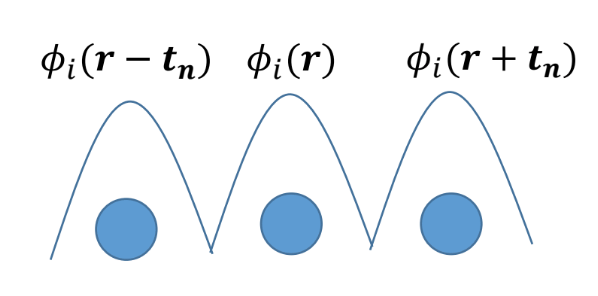

In [7]:
from IPython.display import Image
Image("./img/LCAO-base.png")

詳細な計算は省きますが、このLCAO基底をBloch状態が満たすシュレディンガー方程式に代入し、整理してやると、ブロッホ状態の固有値を計算する問題は、ハミルトニアンで決まる行列要素
$$
M_{ij}=\int dr \Phi^*_j(k,r)(-\frac{\hbar^2\nabla^2}{2m}+V(r)) \Phi_j(k,r)
$$
をもつ行列$M$と、重なり積分と呼ばれる行列要素が
$$
S_{ij}=\int dr \Phi^*_j(k,r)\Phi_j(k,r)
$$
で定義される行列$S$について
$$
det|M(k)-E_k S(k)|=0
$$
を解くことに帰着します。

強束縛模型では、重なり積分は無視し、$M_{ij}$についても最近接原子間のみの項を残します。最近接原子間の距離を$t_I$とし、対角項で残る運動エネルギーの部分とポテンシャルからの寄与を分けて
$$
M_{ij}=E_i \delta_{ij} + \sum_{t_I} e^{ik\cdot t_I}\int dr \phi^*_j(r)V(r)\phi_i(r-t_I)
$$
のように書き、$\int dr \phi^*_j(r)V(r)\phi_i(r-t_I)$を原子軌道の種類で決まるパラメータとして扱います。

## グラフェンの強束縛模型
では本題のグラフェンの強束縛模型を考えてみましょう。グラフェンは炭素原子が6角格子を組んだ構造をしています。グラフェンの構造の模式図と単位胞を下図に示します。


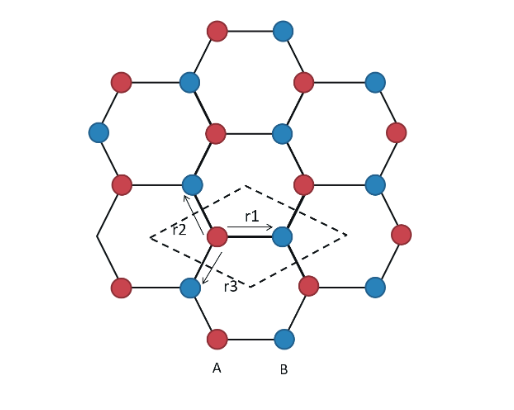

In [14]:
from IPython.display import Image
Image("./img/graphene.png")

単位胞にはそれぞれ2つの炭素原子が含まれています。グラフェンで特徴的な電子状態を示すのはC原子の$p_z$軌道なので、単位胞の原子のそれぞれの$p_z$によって作られる2x2の行列を波数ごとに対角化することにします。

最近接の炭素原子間を結ぶベクトルは格子定数を$a$として
$$
r_1=(1,0)a 
$$
$$
r_2=(-\frac{1}{2}, \frac{\sqrt{3}}{2})a 
$$
$$
r_3=(-\frac{1}{2}, -\frac{\sqrt{3}}{2})a
$$
で表されます。

$p_z$軌道間の　$\int dr \phi^*_j(r)V(r)\phi_i(r-t_I)$ のパラメータをtとし、$M_{ij}$の対角項は波数によらない定数なので０とすると、
$$
f(k)=-t(\exp(ik\cdot r_1)+\exp(ik\cdot r_2)+\exp(ik\cdot r_3)) 
=-t(\exp(ik_x a)+2\exp(\frac{ik_x a}{2})\cos{\frac{\sqrt{3}k_y a}{2}})
$$
で決まる
$$
M(k)=\left( 
 \begin{array}{cc}
	0 & f(k) \\
	f*(k) & 0
 \end{array}
\right)
$$
の対角化を考えれば良いことが分かります。


グラフェンの第一ブリルアンゾーンは下図のようになっています。


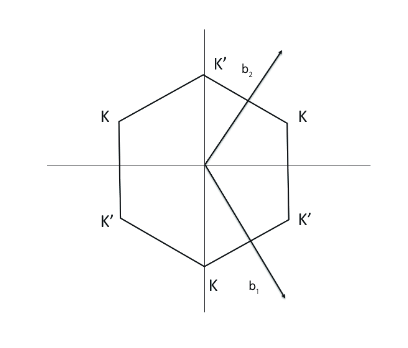

In [16]:
from IPython.display import Image
Image("./img/BZ.png")

グラフェンは高対称点、K,K'周りに特徴的なバンド分散が現れることが知られています。
$$
K=\frac{4\pi}{3a}(0,-\frac{1}{\sqrt{3}}),\frac{2\pi}{3a}(1,\frac{1}{\sqrt{3}}),\frac{2\pi}{3a}(-1,\frac{1}{\sqrt{3}}) 
$$

$$
K'=\frac{4\pi}{3a}(0,-\frac{1}{\sqrt{3}}),\frac{2\pi}{3a}(1,-\frac{1}{\sqrt{3}}),\frac{2\pi}{3a}(-1,-\frac{1}{\sqrt{3}}) 
$$
なので、K,K'を通るy軸に沿ったバンド分散を見てみましょう。
以下はそのサンプルコードです。格子定数やパラメータtは単純に1.0としています。

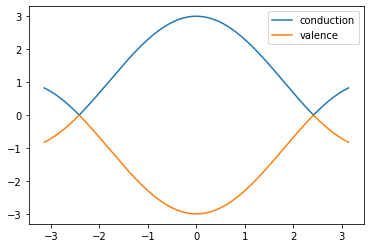

In [15]:
import matplotlib.pyplot as plt
import math
import numpy as np

def H(t,a,kx,ky):
    f=-t*(np.exp(1.0j*kx*a)+2.0*np.exp(1.0j*kx*a*0.5)*math.cos(math.sqrt(3)*ky*a*0.5))
    ham=[[0.0, f],[np.conjugate(f), 0.0]]
    return ham

eigenv=[]
eigenc=[]

path=np.linspace(-math.pi, math.pi, 500)
deltak=0.001

gap=0.5
for kpt in path:
    
    ham=H(1.0,1.0,0.0,kpt)
    eig, l=np.linalg.eig(ham)
    
    eigenc.append(eig[0].real)
    eigenv.append(eig[1].real)
 

plt.plot(path,eigenc,label="conduction")
plt.plot(path,eigenv,label="valence")
plt.legend()
plt.show() 

ちょうどK,K'の部分で上側のバンドと下側のバンドが交差しています。このグラフでは少しわかりにくいですが交差している点を拡大して見ると、ほぼ線形のバンド分散が交差した状態になっています。波数~運動量とみなすと、エネルギーとの関係が質量のないDirac粒子（ニュートリノ）のそれを同じになるので、Dirac Fermion状態が固体で実現しているとも言えます。あと、この交差している構造をDirac coneと呼んだりします。


## グラフェンナノリボン
上記の例は、端のないグラフェンを考えていました。端のあるグラフェンもグラフェンナノリボンといって、リソグラフィーでグラフェンを加工したり、多環分子を金属表面上で重合させたりして作ることができます。面白いことに、模式図に示したようなzigzag edgeと呼ばれる端がある場合、エッジ状態という特異な電子状態が出ます。これも強束縛模型で確かめることができます。

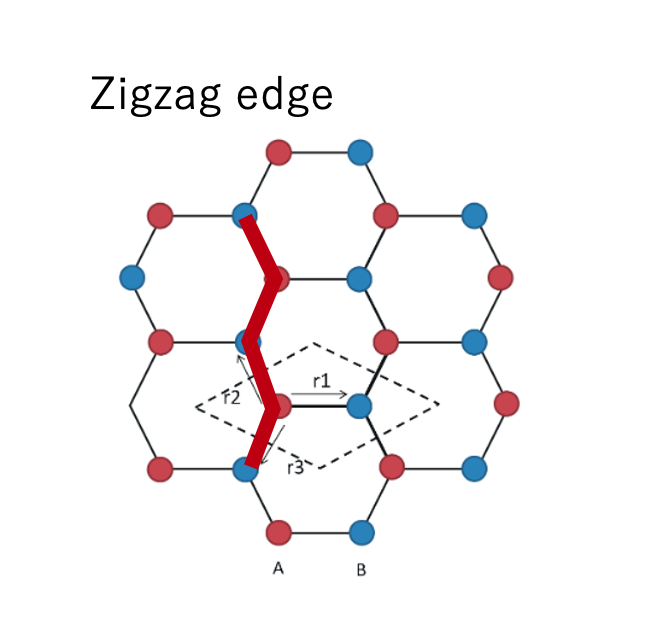

In [17]:
from IPython.display import Image
Image("./img/zigzag.png")

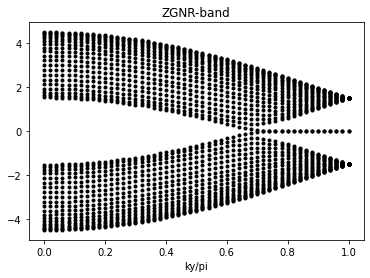

In [4]:
import numpy
import math
import matplotlib.pyplot as plt
#zigzag nanoribbon
'calculate band dispersion along Gamma Y'
sample=51
t=1.5

modelsize=20

kpoint=numpy.linspace(0,1,sample)

tot=[]

for ky in kpoint:
    
    kya=ky*math.pi
    '2x2 matrix for upper'
    upper=[[0.0, t],
            [0.0, 0.0]
            ]
    '2x2 matrix for lower'
    lower=[[0.0, 0.0],
            [t, 0.0]
            ]
    '2x2 matrix for other diagonal block'
    diag=[[0.0, t*2.0*math.cos(kya/2.0)],
            [t*2.0*math.cos(kya/2.0), 0.0]
            ]
    
    'fill the matrix'
    matrix=numpy.zeros(((modelsize)*2,(modelsize)*2))
    
    for i in range(modelsize):
        for j in range(modelsize):
            if j==i:
                matrix[j*2:(j+1)*2, i*2:(i+1)*2 ]=diag
            elif j==i-1:
                matrix[j*2:(j+1)*2, i*2:(i+1)*2 ]=upper
            elif j==i+1:
                matrix[j*2:(j+1)*2, i*2:(i+1)*2 ]=lower
                
                    
    A=numpy.mat(matrix)
    #print(A)
            
    (l,v)=numpy.linalg.eig(A)
    result=[kya,l,v]
    tot.append(result)

klist=([x[0]/math.pi for x in tot])

#print(tot[0][1][2])
'plotting the band structure'

for i in range(modelsize*2):
    eigenval=[]
    for j in range(len(klist)):
        eigenval.append(tot[j][1][i].real)
    
    plt.plot(klist,eigenval,'.',color="0")

plt.xlabel("ky/pi") 
titleString="ZGNR-band"
plt.title(titleString)
plt.show()